<a href="https://colab.research.google.com/github/ThunchanokChai/SC637703-2023/blob/main/individual_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import data

In [2]:
rice = read.csv("/content/riceClassification.csv")
head(rice)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,4537,92.22932,64.01277,0.7199162,4677,76.00452,0.6575362,273.085,0.7645096,1.440796,1
2,2,2872,74.69188,51.40045,0.7255527,3015,60.47102,0.7130089,208.317,0.8316582,1.453137,1
3,3,3048,76.29316,52.04349,0.7312109,3132,62.29634,0.7591532,210.012,0.8684336,1.465950,1
4,4,3073,77.03363,51.92849,0.7386387,3157,62.55130,0.7835288,210.657,0.8702031,1.483456,1
5,5,3693,85.12478,56.37402,0.7492816,3802,68.57167,0.7693750,230.332,0.8747433,1.510000,1
6,6,2990,77.41707,50.95434,0.7528609,3080,61.70078,0.5848983,216.930,0.7984391,1.519342,1


#Data Explore

In [5]:
install.packages('DataExplorer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘gridExtra’, ‘networkD3’




In [7]:
library('DataExplorer')
head(rice)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,4537,92.22932,64.01277,0.7199162,4677,76.00452,0.6575362,273.085,0.7645096,1.440796,1
2,2,2872,74.69188,51.40045,0.7255527,3015,60.47102,0.7130089,208.317,0.8316582,1.453137,1
3,3,3048,76.29316,52.04349,0.7312109,3132,62.29634,0.7591532,210.012,0.8684336,1.465950,1
4,4,3073,77.03363,51.92849,0.7386387,3157,62.55130,0.7835288,210.657,0.8702031,1.483456,1
5,5,3693,85.12478,56.37402,0.7492816,3802,68.57167,0.7693750,230.332,0.8747433,1.510000,1
6,6,2990,77.41707,50.95434,0.7528609,3080,61.70078,0.5848983,216.930,0.7984391,1.519342,1


In [8]:
summary(rice)

       id             Area       MajorAxisLength  MinorAxisLength
 Min.   :    1   Min.   : 2522   Min.   : 74.13   Min.   :34.41  
 1st Qu.: 4547   1st Qu.: 5962   1st Qu.:145.68   1st Qu.:51.39  
 Median : 9093   Median : 6660   Median :153.88   Median :55.72  
 Mean   : 9093   Mean   : 7036   Mean   :151.68   Mean   :59.81  
 3rd Qu.:13639   3rd Qu.: 8423   3rd Qu.:160.06   3rd Qu.:70.16  
 Max.   :18185   Max.   :10210   Max.   :183.21   Max.   :82.55  
  Eccentricity      ConvexArea    EquivDiameter        Extent      
 Min.   :0.6766   Min.   : 2579   Min.   : 56.67   Min.   :0.3832  
 1st Qu.:0.8916   1st Qu.: 6125   1st Qu.: 87.13   1st Qu.:0.5385  
 Median :0.9233   Median : 6843   Median : 92.09   Median :0.6012  
 Mean   :0.9154   Mean   : 7226   Mean   : 94.13   Mean   :0.6167  
 3rd Qu.:0.9414   3rd Qu.: 8645   3rd Qu.:103.56   3rd Qu.:0.6957  
 Max.   :0.9668   Max.   :11008   Max.   :114.02   Max.   :0.8866  
   Perimeter       Roundness       AspectRation       Class   

In [9]:
introduce(rice)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
18185,12,0,12,0,0,18185,218220,1458216


#Select Data


In [10]:
rice_new = rice[,2:12]

In [11]:
head(rice_new)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,4537,92.22932,64.01277,0.7199162,4677,76.00452,0.6575362,273.085,0.7645096,1.440796,1
2,2872,74.69188,51.40045,0.7255527,3015,60.47102,0.7130089,208.317,0.8316582,1.453137,1
3,3048,76.29316,52.04349,0.7312109,3132,62.29634,0.7591532,210.012,0.8684336,1.465950,1
4,3073,77.03363,51.92849,0.7386387,3157,62.55130,0.7835288,210.657,0.8702031,1.483456,1
5,3693,85.12478,56.37402,0.7492816,3802,68.57167,0.7693750,230.332,0.8747433,1.510000,1
6,2990,77.41707,50.95434,0.7528609,3080,61.70078,0.5848983,216.930,0.7984391,1.519342,1


#PCA Data

##Split data into X and Y

In [13]:
X = rice_new[,1:10]
head(X)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4537,92.22932,64.01277,0.7199162,4677,76.00452,0.6575362,273.085,0.7645096,1.440796
2,2872,74.69188,51.40045,0.7255527,3015,60.47102,0.7130089,208.317,0.8316582,1.453137
3,3048,76.29316,52.04349,0.7312109,3132,62.29634,0.7591532,210.012,0.8684336,1.465950
4,3073,77.03363,51.92849,0.7386387,3157,62.55130,0.7835288,210.657,0.8702031,1.483456
5,3693,85.12478,56.37402,0.7492816,3802,68.57167,0.7693750,230.332,0.8747433,1.510000
6,2990,77.41707,50.95434,0.7528609,3080,61.70078,0.5848983,216.930,0.7984391,1.519342


In [14]:
Y = rice_new[,11]
head(Y)

[1] 1 1 1 1 1 1

##Check the Correlation

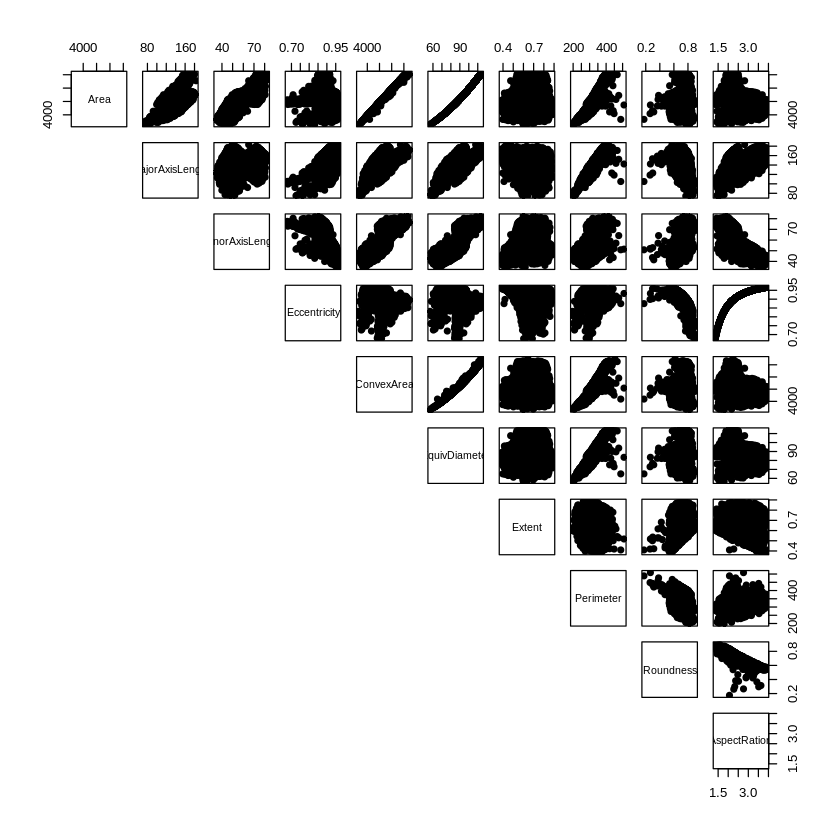

In [15]:
pairs(X, pch = 19, lower.panel = NULL)

##PCA

In [18]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
library("ggplot2")
library("factoextra")

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [20]:
res.pca = prcomp(X,scale = TRUE)

In [21]:
print(summary(res.pca))
#เลือก 2 PC เนื่องจาก 2 PC Cumulative proportion > 0.8

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.5263 1.6144 0.91581 0.33896 0.21179 0.09272 0.05079
Proportion of Variance 0.6382 0.2606 0.08387 0.01149 0.00449 0.00086 0.00026
Cumulative Proportion  0.6382 0.8988 0.98269 0.99418 0.99867 0.99953 0.99979
                           PC8     PC9    PC10
Standard deviation     0.03931 0.02004 0.01333
Proportion of Variance 0.00015 0.00004 0.00002
Cumulative Proportion  0.99994 0.99998 1.00000


In [22]:
Sd_PC = res.pca$sdev
eigval = Sd_PC^2
eigvec = res.pca$rotation
eigval_mean = mean(eigval)
#แสดงค่าeigenvalue
eigval

[1] 6.3821106431 2.6061352392 0.8387034895 0.1148961535 0.0448538001
 [6] 0.0085963642 0.0025798025 0.0015451000 0.0004015918 0.0001778160

###Scree plot

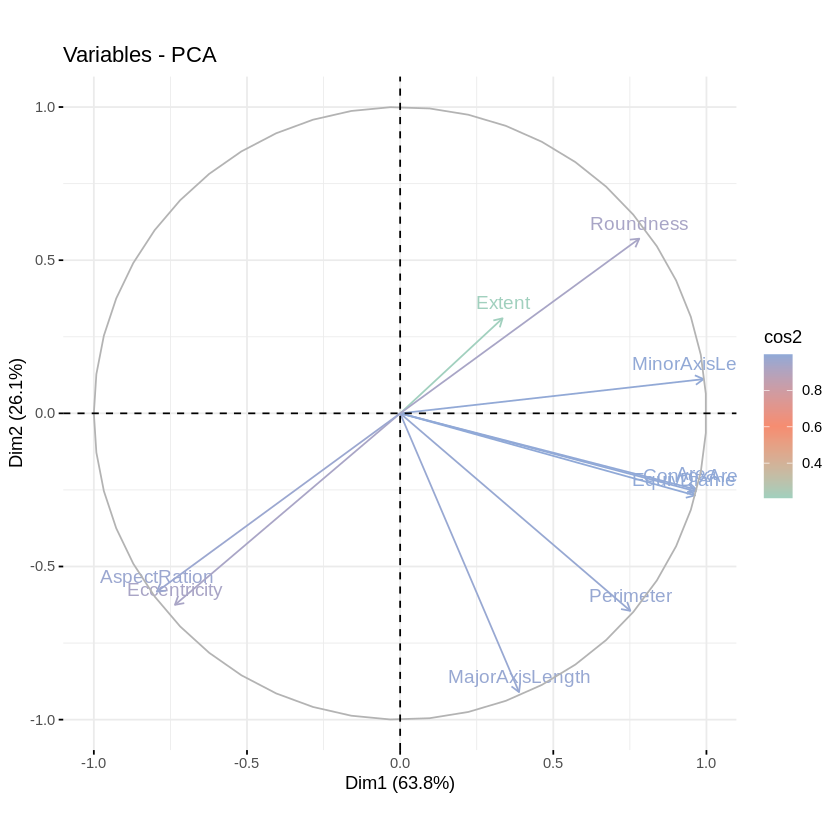

In [23]:
fviz_pca_var(res.pca,col.var="cos2", gradient.cols=c("#A1D0BE","#F68D71","#90A9D7"))

##Correlation circle

In [24]:
library(corrplot)

corrplot 0.92 loaded



In [26]:
corrplot(var$cos2,method = "color", type = "full",  diag = TRUE,tl.col = "black", bg ="white", col = NULL)

ERROR: ignored

###create new data frame

In [27]:
# New Data
PCA = res.pca$x[,1:2]

In [28]:
# สร้าง df ใหม่ที่รวม X_train และ Y_train
PCA_X_data <- cbind(PCA,Y)

In [29]:
# เปลี่ยนชื่อ Y_train เป็น Class
colnames(PCA_X_data)[colnames(PCA_X_data)=="Y"] = "Class"

In [30]:
head(PCA_X_data)

PC1,PC2,Class
-0.3540735,8.442214,1
-2.8548413,11.013442,1
-2.4827372,11.056296,1
-2.4931637,10.949085,1
-1.5813459,9.952077,1
-3.2796472,9.918881,1


In [31]:
# ทำให้เป็นdata frame จะได้ data ใหม่
PCA_data = as.data.frame(PCA_X_data)

#Prepare Data before ML

### Split normal data into training (80%) and test (20%) data

In [36]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’




In [37]:
library(caret)
library(dplyr)

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [38]:
set.seed(555)
training.samples = rice_new$Class %>% createDataPartition(p = 0.8, list = FALSE)

In [39]:
train_data = rice_new[training.samples, ]
head(train_data)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,4537,92.22932,64.01277,0.7199162,4677,76.00452,0.6575362,273.085,0.7645096,1.440796,1
2,2872,74.69188,51.40045,0.7255527,3015,60.47102,0.7130089,208.317,0.8316582,1.453137,1
3,3048,76.29316,52.04349,0.7312109,3132,62.29634,0.7591532,210.012,0.8684336,1.465950,1
4,3073,77.03363,51.92849,0.7386387,3157,62.55130,0.7835288,210.657,0.8702031,1.483456,1
6,2990,77.41707,50.95434,0.7528609,3080,61.70078,0.5848983,216.930,0.7984391,1.519342,1
7,3556,84.32356,55.41306,0.7537616,3636,67.28774,0.7502110,227.007,0.8671478,1.521727,1


In [40]:
test_data = rice_new[-training.samples, ]
head(test_data)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
5,3693,85.12478,56.37402,0.7492816,3802,68.57167,0.7693750,230.332,0.8747433,1.510000,1
13,2805,77.04768,49.24268,0.7691074,2950,59.76150,0.6032258,209.823,0.8006386,1.564653,1
14,3265,83.37849,52.76486,0.7742863,3420,64.47579,0.5758377,227.853,0.7902847,1.580190,1
17,3475,84.58115,53.19120,0.7775042,3539,66.51697,0.6522147,221.295,0.8917056,1.590134,1
19,3028,81.27755,49.16736,0.7962774,3114,62.09162,0.7536088,211.667,0.8492967,1.653079,1
29,3867,92.47995,54.37938,0.8088517,3960,70.16849,0.7812121,240.315,0.8414383,1.700644,1


### Split PCA data into training (80%) and test (20%) data

In [41]:
set.seed(555)
PCA_training_samples = PCA_data$Class %>% createDataPartition(p = 0.8, list = FALSE)

In [42]:
PCA_train_data = PCA_data[PCA_training_samples, ]
head(PCA_train_data)

,PC1,PC2,Class
,<dbl>,<dbl>,<dbl>
1,-0.3540735,8.442214,1
2,-2.8548413,11.013442,1
3,-2.4827372,11.056296,1
4,-2.4931637,10.949085,1
6,-3.2796472,9.918881,1
7,-1.8998950,9.938682,1


In [43]:
PCA_test_data = PCA_data[-PCA_training_samples, ]
head(PCA_test_data)


,PC1,PC2,Class
,<dbl>,<dbl>,<dbl>
5,-1.581346,9.952077,1
13,-3.732569,9.887622,1
14,-3.056844,9.019568,1
17,-2.403280,9.611627,1
19,-3.383410,9.704522,1
29,-2.162829,8.340953,1


#LDA without PCA

##Fit the LDA Model

In [44]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [45]:
library(MASS)
model = lda(Class~., data=train_data)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [46]:
model

Call:
lda(Class ~ ., data = train_data)

Prior probabilities of groups:
        0         1 
0.4506461 0.5493539 

Group means:
      Area MajorAxisLength MinorAxisLength Eccentricity ConvexArea
0 8355.210        153.7079        69.96830    0.8889398   8572.598
1 5949.242        149.9925        51.43102    0.9372309   6115.765
  EquivDiameter    Extent Perimeter Roundness AspectRation
0     102.95926 0.6507613  368.9660 0.7694700     2.200746
1      86.85339 0.5864649  337.2821 0.6573475     2.926805

Coefficients of linear discriminants:
                          LD1
Area              0.006168862
MajorAxisLength   0.484083660
MinorAxisLength  -0.168203848
Eccentricity    -26.178727189
ConvexArea       -0.003978817
EquivDiameter    -0.660393297
Extent            0.278957537
Perimeter        -0.112493115
Roundness       -43.474794377
AspectRation    -11.797779908

##use LDA model to make predictions on test data

In [47]:
predicted = predict(model, test_data)

In [48]:
names(predicted)

[1] "class"     "posterior" "x"

In [49]:
head(predicted$x)

,LD1
5,1.863617
13,7.201987
14,5.623898
17,1.756592
19,4.411200
29,1.669404


In [50]:
head(predicted$class)

[1] 1 1 1 1 1 1
Levels: 0 1

##find accuracy of model

In [51]:
mean(predicted$class==test_data$Class)

[1] 0.988452

##Visualize the Results

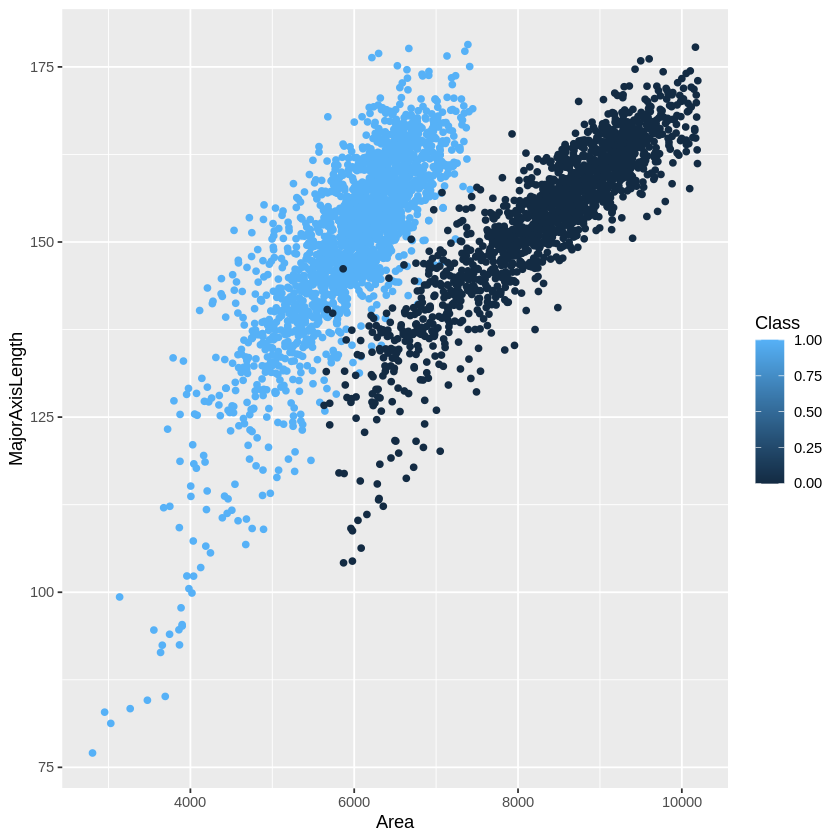

In [52]:
library(ggplot2)
ggplot(test_data, aes(Area,MajorAxisLength)) +
  geom_point(aes(color = Class))

#LDA with PCA

##Fit the LDA Model

In [53]:
model = lda(Class~., PCA_train_data)

In [54]:
model

Call:
lda(Class ~ ., data = PCA_train_data)

Prior probabilities of groups:
        0         1 
0.4506461 0.5493539 

Group means:
        PC1        PC2
0  2.487575  0.3659154
1 -2.053295 -0.3038467

Coefficients of linear discriminants:
           LD1
PC1 -0.9766348
PC2 -0.3566848

##use LDA model to make predictions on test data

In [55]:
predicted = predict(model, PCA_test_data)

In [56]:
names(predicted)

[1] "class"     "posterior" "x"

In [57]:
head(predicted$x)

,LD1
5,-2.0128843
13,0.1110653
14,-0.2392503
17,-1.0887222
19,-0.1646271
29,-0.8703247


In [58]:
head(predicted$class)

[1] 0 1 1 0 1 0
Levels: 0 1

##find accuracy of model

In [59]:
mean(predicted$class==PCA_test_data$Class)

[1] 0.9862524

##Visualize the Results

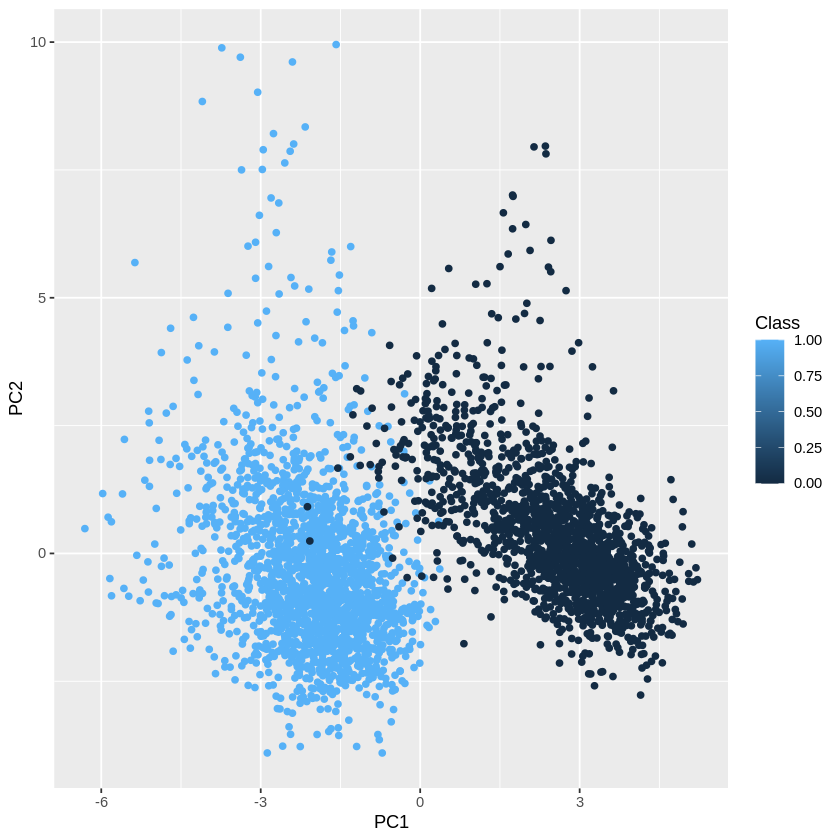

In [60]:
ggplot(PCA_test_data, aes(PC1,PC2)) +
  geom_point(aes(color = Class))

#COMPARE LDA with and without PCA

In [ ]:
#accuracy of LDA model = 0.988452020896343

In [ ]:
#accuracy of LDA model with PCA = 0.98625240582898

In [ ]:
#####LDA model with PCA better than LDA model

#Logistic Regression without PCA

##Fit the logistic model

###LOGISTIC REGRESSION - FULL MODEL

In [61]:
full_model = glm(Class ~., data= train_data, family = binomial)
summary(full_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Class ~ ., family = binomial, data = train_data)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.910e+02  4.689e+01   8.338  < 2e-16 ***
Area             2.650e-02  5.399e-03   4.908 9.18e-07 ***
MajorAxisLength  2.072e+00  1.969e-01  10.521  < 2e-16 ***
MinorAxisLength -6.596e-01  4.328e-01  -1.524    0.128    
Eccentricity    -1.184e+02  2.481e+01  -4.772 1.82e-06 ***
ConvexArea      -1.800e-02  2.387e-03  -7.540 4.72e-14 ***
EquivDiameter   -3.788e+00  7.474e-01  -5.068 4.02e-07 ***
Extent           1.239e+00  1.015e+00   1.220    0.222    
Perimeter       -1.865e-01  3.120e-02  -5.977 2.28e-09 ***
Roundness       -8.707e+01  1.140e+01  -7.639 2.19e-14 ***
AspectRation    -5.089e+01  6.973e+00  -7.298 2.93e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20025.83  on 14547  degrees of freedom
Residual deviance:   89

###LOGISTIC REGRESSION - STEPWISE MODEL

In [62]:
stepwise_model = glm(Class ~., data= train_data, family = binomial) %>% stepAIC(trace = FALSE)
summary(stepwise_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Class ~ Area + MajorAxisLength + MinorAxisLength + 
    Eccentricity + ConvexArea + EquivDiameter + Perimeter + Roundness + 
    AspectRation, family = binomial, data = train_data)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.900e+02  4.690e+01   8.315  < 2e-16 ***
Area             2.662e-02  5.409e-03   4.922 8.57e-07 ***
MajorAxisLength  2.065e+00  1.967e-01  10.498  < 2e-16 ***
MinorAxisLength -6.532e-01  4.327e-01  -1.510    0.131    
Eccentricity    -1.174e+02  2.480e+01  -4.733 2.22e-06 ***
ConvexArea      -1.808e-02  2.393e-03  -7.557 4.13e-14 ***
EquivDiameter   -3.794e+00  7.492e-01  -5.064 4.10e-07 ***
Perimeter       -1.844e-01  3.130e-02  -5.893 3.80e-09 ***
Roundness       -8.609e+01  1.141e+01  -7.546 4.49e-14 ***
AspectRation    -5.075e+01  6.969e+00  -7.282 3.28e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null

###COMPARE FULL and STEPWISE MODEL

####Full Model

In [63]:
# Prediction of Probability
prob_full = predict(full_model, test_data, type = "response")
head(prob_full)

5        13        14        17        19        29 
0.9999999 1.0000000 1.0000000 0.9999999 1.0000000 0.9999970

In [64]:
# Predicted Class
predicted_full = ifelse(prob_full > 0.5, "1", "0")
head(predicted_full)

5  13  14  17  19  29 
"1" "1" "1" "1" "1" "1"

In [65]:
# Accuracy
mean(predicted_full == test_data$Class)

[1] 0.9909266

####Stepwise Model

In [66]:
# Prediction of Probability
prob_stepwise = predict(stepwise_model, test_data, type = "response")
head(prob_stepwise)

5        13        14        17        19        29 
0.9999999 1.0000000 1.0000000 0.9999999 1.0000000 0.9999966

In [67]:
# Predicted Class
predicted_stepwise = ifelse(prob_stepwise > 0.5, "1", "0")
head(predicted_stepwise)


5  13  14  17  19  29 
"1" "1" "1" "1" "1" "1"

In [68]:
# Accuracy
mean(predicted_stepwise == test_data$Class)

[1] 0.9912015

In [ ]:
####STEPWISE MODEL is better than FULL MODEL

##Goodness of Fit of STEPWISE MODEL

In [70]:
install.packages("performance")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘insight’, ‘datawizard’




In [71]:
library(performance)
performance_hosmer(stepwise_model, n_bins = 10)

Summary: model seems to fit well.



# Hosmer-Lemeshow Goodness-of-Fit Test

  Chi-squared: 12.409
           df:  8    
      p-value:  0.134

##Assumption and Diagnostic Checking

###Linearity

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ MASS::select()  masks dplyr::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,logit_sw,predictors,predictors.value
,<dbl>,<chr>,<dbl>
1,12.711487,Area,4537
2,36.043653,Area,2872
3,28.008374,Area,3048
4,26.827430,Area,3073
5,36.043653,Area,2990
6,19.363866,Area,3556
7,15.362853,Area,3788
8,36.043653,Area,2629
9,-9.325076,Area,5719


`geom_smooth()` using formula = 'y ~ x'


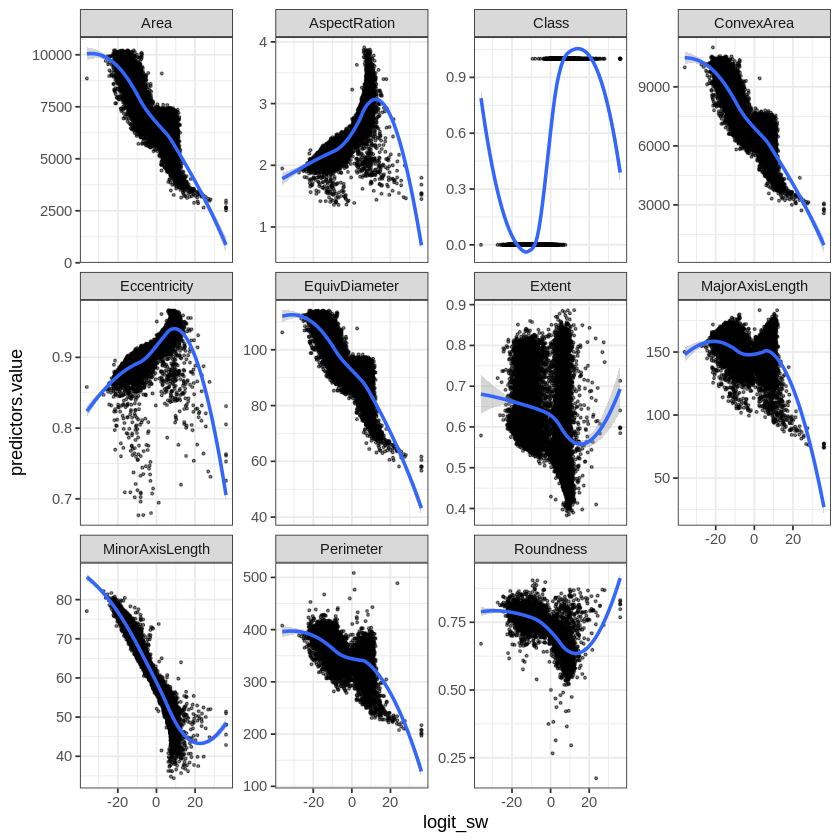

In [72]:
library(tidyverse)
library(ggplot2)
library(broom)
mydata = train_data %>% dplyr :: select_if(is.numeric)

probabilities_stepwise = predict(stepwise_model, train_data, type = "response")
logit_sw = log(probabilities_stepwise/(1 - probabilities_stepwise))
mydata2 = mydata %>% mutate(logit_sw) %>% gather(key = "predictors", value = "predictors.value",-logit_sw)

head(mydata2,10)

ggplot(mydata2, aes(logit_sw,predictors.value)) + geom_point(size = 0.5, alpha = 0.5) + geom_smooth(method="loess") + theme_bw() + facet_wrap(~predictors,scales="free_y")

###Influential Values

.rownames,Class,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Perimeter,Roundness,AspectRation,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid,index
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2408,1,5476,142.1697,51.48948,0.9321124,6178,83.50006,508.511,0.2661170,2.761141,1.026653,0.7825129,0.6677870,0.2485412,0.2167380,1.357636,1927
2702,0,5603,102.5307,73.76704,0.6945310,5750,84.46278,291.651,0.8277583,1.389926,1.193035,-1.7075913,0.3140492,0.2482077,0.2200596,-2.061757,2159
17554,0,6908,152.1135,64.18938,0.9066036,7821,93.78453,476.522,0.3822929,2.369762,1.417212,-1.8078981,0.2765167,0.2481708,0.2179473,-2.125493,14043


`geom_smooth()` using formula = 'y ~ x'


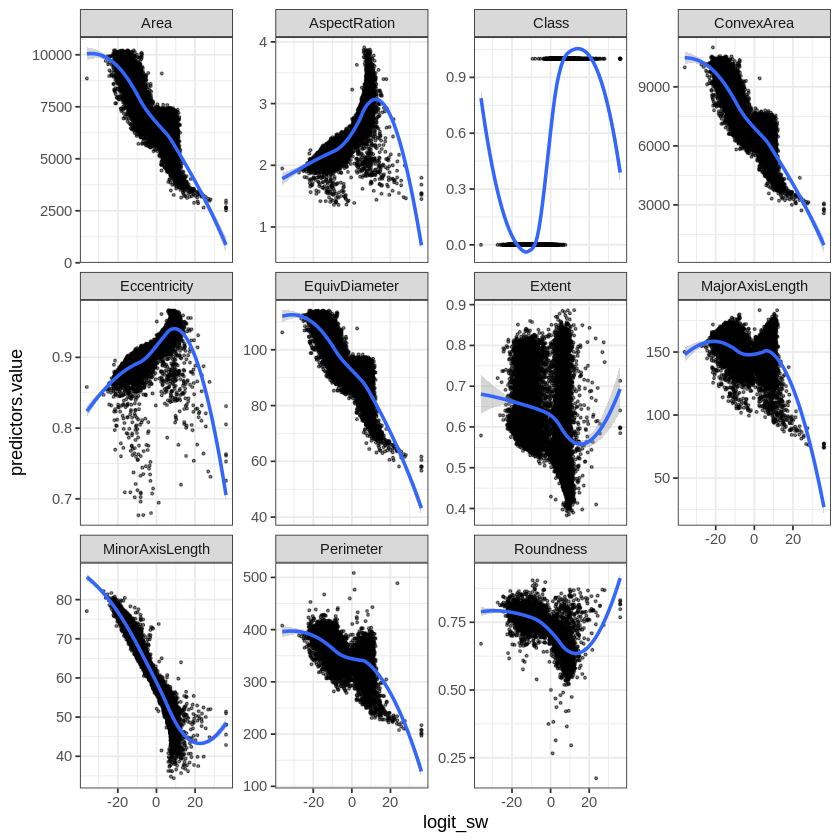

In [76]:
model_sw_data = augment(stepwise_model) %>% mutate(index=1:n())
model_sw_data %>% top_n(3,.cooksd)
ggplot(mydata2, aes(logit_sw,predictors.value)) + geom_point(size = 0.5, alpha = 0.5) + geom_smooth(method="loess") + theme_bw() + facet_wrap(~predictors,scales="free_y")

###Multicolinearity

In [77]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [78]:
library(car)
vif(stepwise_model)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode




Area MajorAxisLength MinorAxisLength    Eccentricity      ConvexArea 
     1121.65381       499.15806       202.01067        33.68903       236.71649 
  EquivDiameter       Perimeter       Roundness    AspectRation 
     1069.26252        62.12372        36.69464       287.38644

##ODD RATIO

In [79]:
model.OR <- exp(stepwise_model$coefficients)
round(model.OR, 3)

(Intercept)            Area MajorAxisLength MinorAxisLength    Eccentricity 
  2.383161e+169    1.027000e+00    7.888000e+00    5.200000e-01    0.000000e+00 
     ConvexArea   EquivDiameter       Perimeter       Roundness    AspectRation 
   9.820000e-01    2.200000e-02    8.320000e-01    0.000000e+00    0.000000e+00

#Logistic Regression with PCA

##Fit the logistic model

###LOGISTIC REGRESSION - FULL MODEL

In [80]:
full_model = glm(Class ~., data = PCA_train_data, family = binomial)
summary(full_model)


Call:
glm(formula = Class ~ ., family = binomial, data = PCA_train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.32365    0.09333  -3.468 0.000525 ***
PC1         -3.62101    0.12073 -29.993  < 2e-16 ***
PC2         -0.90720    0.03989 -22.745  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20025.8  on 14547  degrees of freedom
Residual deviance:  1335.5  on 14545  degrees of freedom
AIC: 1341.5

Number of Fisher Scoring iterations: 9


###LOGISTIC REGRESSION - STEPWISE MODEL

In [81]:
stepwise_model = glm(Class ~., data= PCA_train_data, family = binomial) %>% stepAIC(trace = FALSE)
summary(stepwise_model)


Call:
glm(formula = Class ~ PC1 + PC2, family = binomial, data = PCA_train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.32365    0.09333  -3.468 0.000525 ***
PC1         -3.62101    0.12073 -29.993  < 2e-16 ***
PC2         -0.90720    0.03989 -22.745  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20025.8  on 14547  degrees of freedom
Residual deviance:  1335.5  on 14545  degrees of freedom
AIC: 1341.5

Number of Fisher Scoring iterations: 9


###COMPARE FULL and STEPWISE MODEL

####Full Model

In [82]:
# Prediction of Probability
prob_full = predict(full_model, PCA_test_data , type = "response")
head(prob_full)

5         13         14         17         19         29 
0.02592986 0.98554274 0.92842083 0.41556680 0.95786354 0.48527399

In [83]:
# Predicted Class
predicted_full = ifelse(prob_full > 0.5, "1", "0")
head(predicted_full)


5  13  14  17  19  29 
"0" "1" "1" "0" "1" "0"

In [84]:
# Accuracy
mean(predicted_full == PCA_test_data$Class)

[1] 0.9890019

####Stepwise Model

In [85]:
# Prediction of Probability
prob_stepwise = predict(stepwise_model, PCA_test_data, type = "response")
head(prob_stepwise)

5         13         14         17         19         29 
0.02592986 0.98554274 0.92842083 0.41556680 0.95786354 0.48527399

In [86]:
# Predicted Class
predicted_stepwise = ifelse(prob_stepwise > 0.5, "1", "0")
head(predicted_stepwise)

5  13  14  17  19  29 
"0" "1" "1" "0" "1" "0"

In [87]:
# Accuracy
mean(predicted_stepwise == PCA_test_data$Class)


[1] 0.9890019

In [ ]:
#STEPWISE MODEL is better than FULL MODEL

##Goodness of Fit of STEPWISE MODEL


In [93]:
library(performance)
performance_hosmer(stepwise_model, n_bins = 10000)

Summary: model does not fit well.



# Hosmer-Lemeshow Goodness-of-Fit Test

  Chi-squared: 189745.515
           df:   9998    
      p-value:      0.000

##Assumption and Diagnostic Checking

###Linearity

In [94]:
mydata = PCA_train_data %>% dplyr :: select_if(is.numeric)

probabilities_stepwise = predict(stepwise_model, PCA_train_data, type = "response")
logit_sw = log(probabilities_stepwise/(1 - probabilities_stepwise))
mydata2 = mydata %>% mutate(logit_sw) %>% gather(key = "predictors", value = "predictors.value",-logit_sw)

head(mydata2,10)

,logit_sw,predictors,predictors.value
,<dbl>,<chr>,<dbl>
1,-6.70031354,PC1,-0.3540735
2,0.02238728,PC1,-2.8548413
3,-1.36388419,PC1,-2.4827372
4,-1.22886721,PC1,-2.4931637
5,2.55360028,PC1,-3.2796472
6,-2.46046547,PC1,-1.8998950
7,-3.23225488,PC1,-1.5946546
8,4.99628550,PC1,-4.0077512
9,-12.06888930,PC1,1.3449846


`geom_smooth()` using formula = 'y ~ x'


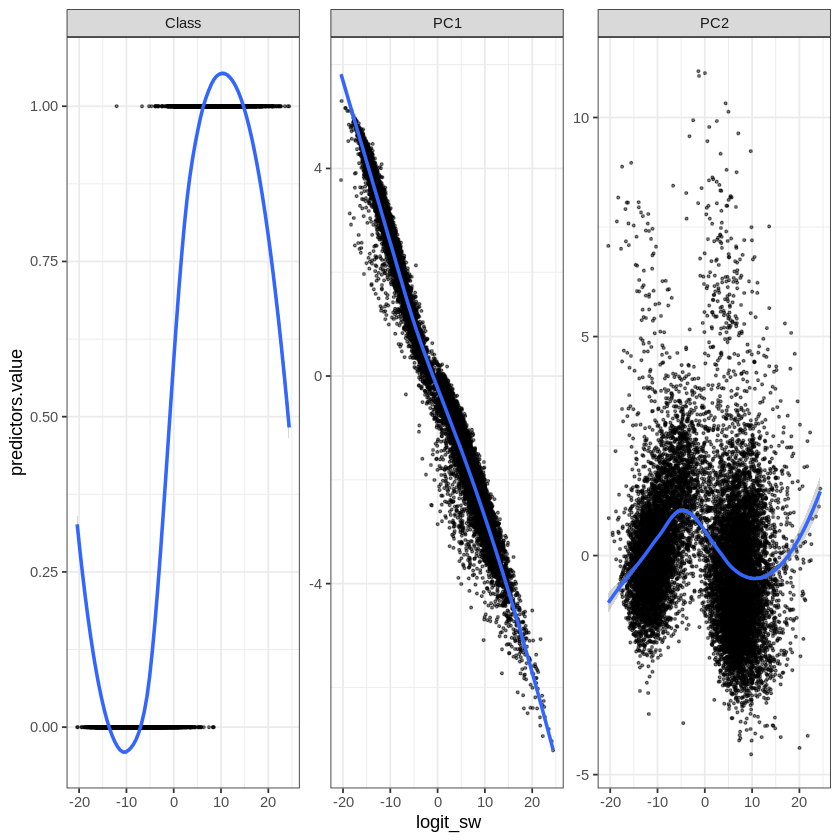

In [95]:
ggplot(mydata2, aes(logit_sw,predictors.value)) + geom_point(size = 0.5, alpha = 0.5) + geom_smooth(method="loess") + theme_bw() + facet_wrap(~predictors,scales="free_y")

###Influential Values

.rownames,Class,PC1,PC2,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid,index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,-0.3540735,8.442214,-6.700314,3.661023,1.273242e-04,0.3014966,0.03449924,3.661256,1
8,1,-1.5946546,9.571077,-3.232255,2.557719,3.576875e-03,0.3022755,0.03042604,2.562306,7
10,1,1.3449846,7.578305,-12.068889,4.913022,1.085540e-06,0.3002703,0.06309246,4.913025,9


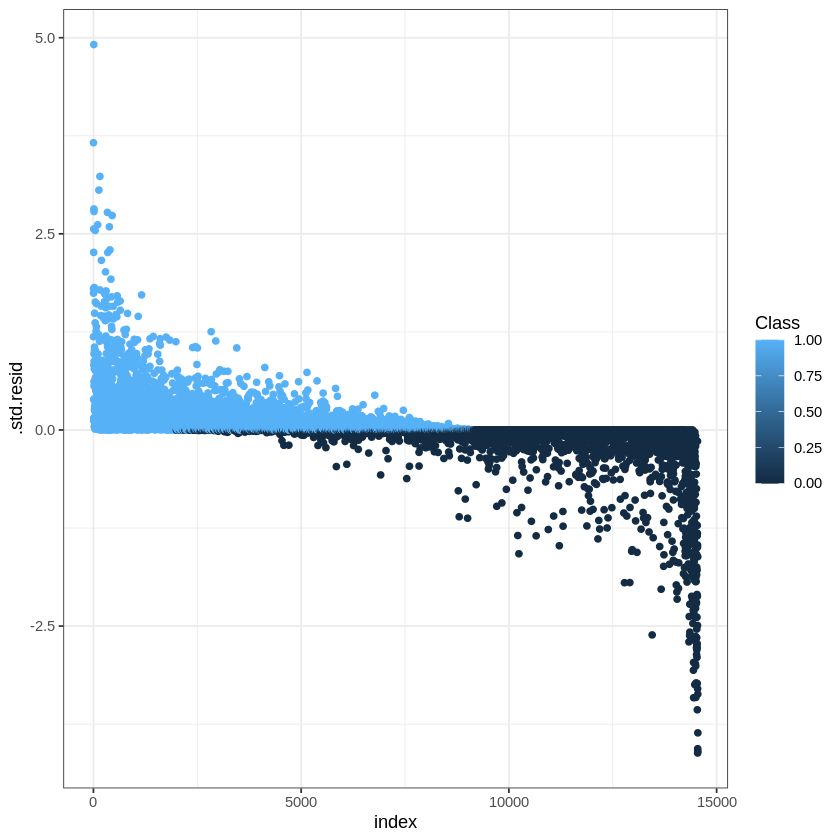

In [96]:
model_sw_data = augment(stepwise_model) %>% mutate(index=1:n())

model_sw_data %>% top_n(3,.cooksd)

ggplot(model_sw_data,aes(index,.std.resid)) + geom_point(aes(color = Class),alpha = 5) + theme_bw()


###Multicolinearity

In [97]:
library(car)
vif(stepwise_model)

PC1      PC2 
1.328425 1.328425

##ODD RATIO

In [98]:
model.OR <- exp(stepwise_model$coefficients)
round(model.OR, 3)

(Intercept)         PC1         PC2 
      0.724       0.027       0.404

#Compare logistic model with and without PCA

In [ ]:
#accuracy of Logistic model = 0.991201539730547

In [ ]:
#accuracy of Logistic model with PCA = 0.989001924663184

In [ ]:
#####Logistic model better than Logistic model with PCA